In [1]:
#import dependencies

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
#Store file path in a variable and read in csv

file = "MasterYouTube.csv"

master_df = pd.read_csv(file)

#Print head
master_df.head()

Unnamed: 0                                        Video Title     Video ID  \
0           0        Sam Smith - Pray (Official Video) ft. Logic  8h--kFui1JA   
1           1         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  j4KvrAUjn6c   
2           2  YoungBoy Never Broke Again Goes Sneaker Shoppi...  t4pRQ0jn23Q   
3           3  周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...  MAjY8mCTXWk   
4           4                                 Cobra Kai Season 2  WIV3xNz8NoM   

   Number of Days Trending            Time Published  Total Views  
0                       29  2018-05-09T17:00:00.000Z     17424422  
1                       29  2018-05-13T18:03:56.000Z      9081270  
2                       28  2018-05-14T14:00:03.000Z      4406761  
3                       28  2018-05-14T15:59:47.000Z     17259071  
4                       28  2018-05-10T17:02:55.000Z      1011030

In [3]:
#Pull out the columns I want

time_df = master_df[["Video Title", "Video ID", "Time Published", "Number of Days Trending", "Total Views"]]

time_df.head()

Video Title     Video ID  \
0        Sam Smith - Pray (Official Video) ft. Logic  8h--kFui1JA   
1         WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  j4KvrAUjn6c   
2  YoungBoy Never Broke Again Goes Sneaker Shoppi...  t4pRQ0jn23Q   
3  周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...  MAjY8mCTXWk   
4                                 Cobra Kai Season 2  WIV3xNz8NoM   

             Time Published  Number of Days Trending  Total Views  
0  2018-05-09T17:00:00.000Z                       29     17424422  
1  2018-05-13T18:03:56.000Z                       29      9081270  
2  2018-05-14T14:00:03.000Z                       28      4406761  
3  2018-05-14T15:59:47.000Z                       28     17259071  
4  2018-05-10T17:02:55.000Z                       28      1011030

In [4]:
#Reformat time so I can pull out just the hour published and put it in a new column
#Pull out just the time of day (Hour) and create a new column

time_df["Hour Published"] = pd.to_datetime(time_df["Time Published"]).dt.hour

time_df

Video Title     Video ID  \
0           Sam Smith - Pray (Official Video) ft. Logic  8h--kFui1JA   
1            WE MADE OUR MOM CRY...HER DREAM CAME TRUE!  j4KvrAUjn6c   
2     YoungBoy Never Broke Again Goes Sneaker Shoppi...  t4pRQ0jn23Q   
3     周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's...  MAjY8mCTXWk   
4                                    Cobra Kai Season 2  WIV3xNz8NoM   
...                                                 ...          ...   
6346  Stephen A. shares theory on why Spurs' Kawhi L...  kA66nAvEEII   
6347   John Mayer On Andy Cohen’s Annoying Habit | WWHL  0WPYpeJA__U   
6348      Top 10 NBA Celebrity Reactions - The Starters  AFC5RaH4xMg   
6349                               Greenland is melting  UKKYt6fWob8   
6350  First Take reacts to Zaza Pachulia falling on ...  0mAS2Gxs08w   

                Time Published  Number of Days Trending  Total Views  \
0     2018-05-09T17:00:00.000Z                       29     17424422   
1     2018-05-13T18:03:56.000Z                       29      9081270   
2     2018-05-14T14:00:03.000Z                       28      4406761   
3     2018-05-14T15:59:47.000Z                       28     17259071   
4     2018-05-10T17:02:55.000Z                       28      1011030   
...                        ...                      ...          ...   
6346  2018-02-22T15:31:36.000Z                        1       707341   
6347  2017-11-28T12:59:47.000Z                        1        35467   
6348  2018-02-28T00:58:13.000Z                        1       455015   
6349  2017-12-01T12:59:15.000Z                        1         6084   
6350  2018-02-26T15:37:37.000Z                        1      1034272   

      Hour Published  
0                 17  
1                 18  
2                 14  
3                 15  
4                 17  
...              ...  
6346              15  
6347              12  
6348               0  
6349              12  
6350              15  

[6351 rows x 6 columns]

In [5]:
#Organize by hour published

time_df = time_df.sort_values(["Hour Published", "Total Views"], ascending=False)

time_df.head()

Video Title     Video ID  \
94    Calvin Harris, Dua Lipa - One Kiss (Official V...  DkeiKbqa02g   
2042            Turkish Airlines - 5 Senses with Dr. Oz  yvicqMrAHvQ   
1207  Jurassic World: Fallen Kingdom - Official Trai...  NooW_RbfdWI   
1785         Hope Detector | Hyundai NFL Super Bowl LII  wJJqGh2HLM8   
17      Calum Scott - What I Miss Most (Official Video)  H7gh2fmdjCU   

                Time Published  Number of Days Trending  Total Views  \
94    2018-05-02T23:01:00.000Z                       21     71017021   
2042  2018-02-04T23:55:21.000Z                        7     23932421   
1207  2018-02-04T23:28:16.000Z                       10     21113889   
1785  2018-02-04T23:31:40.000Z                        8     15904385   
17    2018-05-16T23:00:00.000Z                       27      6379536   

      Hour Published  
94                23  
2042              23  
1207              23  
1785              23  
17                23

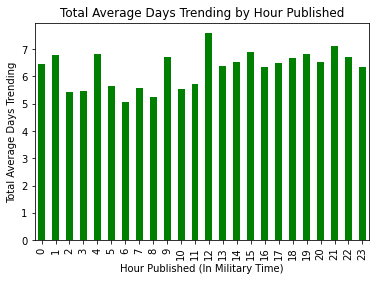

In [20]:
#Find average days trending vs. hour published and put into a bar graph

time_df.groupby('Hour Published')['Number of Days Trending'].mean().plot(kind='bar', color="green")

plt.title("Total Average Days Trending by Hour Published")
plt.xlabel("Hour Published (In Military Time)")
plt.ylabel("Total Average Days Trending")

plt.savefig("TotalDaysTrendingMeanperHourPublishedBar")

plt.show()


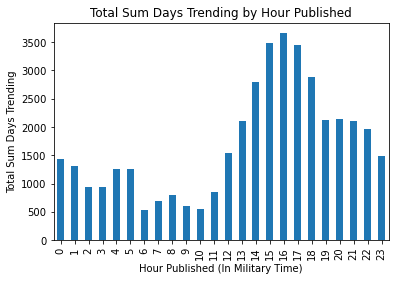

In [22]:
#Do the same but with Sum

time_df.groupby('Hour Published')['Number of Days Trending'].sum().plot(kind='bar')

plt.title("Total Sum Days Trending by Hour Published")
plt.xlabel("Hour Published (In Military Time)")
plt.ylabel("Total Sum Days Trending")

plt.savefig("TotalDaysTrendingSumperHourPublishedBar")

plt.show()

What can I infer from this?

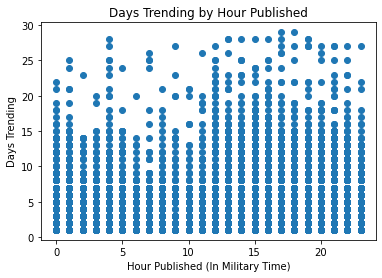

In [15]:
#Scatterplot
plt.scatter(time_df["Hour Published"], time_df["Number of Days Trending"])
plt.title("Days Trending by Hour Published")
plt.xlabel("Hour Published (In Military Time)")
plt.ylabel("Days Trending")

plt.savefig("TotalDaysTrendingperHourPublishedScatter")

plt.show()

In [16]:
#Correlation
hour = time_df["Hour Published"]
days = time_df["Number of Days Trending"]

correlation = st.pearsonr(hour, days)

print(f"The correlation between the two factors is {round(correlation[0],2)}")

The correlation between the two factors is 0.05


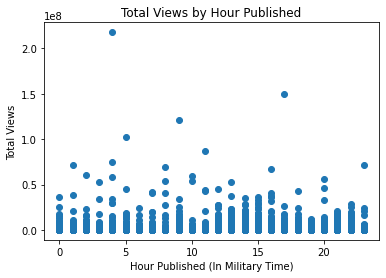

In [11]:
#Scatterplot
plt.scatter(time_df["Hour Published"], time_df["Total Views"])
plt.title("Total Views by Hour Published")
plt.xlabel("Hour Published (In Military Time)")
plt.ylabel("Total Views")

plt.savefig("TotalViewsperHourPublishedScatter")

plt.show()

In [12]:
#Correlation
hour = time_df["Hour Published"]
views = time_df["Total Views"]

correlation = st.pearsonr(hour, views)

print(f"The correlation between the two factors is {round(correlation[0],2)}")

The correlation between the two factors is -0.04


## This shows that there is no noticable correlation between the hour it is published and the number of views that a video receives while trending.

In [22]:
#Find total views of all videos by hour published and put into a df
totalviews = time_df.groupby('Hour Published')['Total Views'].sum()

totalviews

Hour Published
0     325599960
1     344197971
2     303390186
3     279542203
4     729761534
5     531861552
6     145420964
7     281727760
8     335686853
9     392438288
10    204670082
11    317463789
12    397414780
13    648723620
14    721822350
15    875594490
16    844040907
17    764382881
18    595676486
19    377956952
20    509891335
21    501725294
22    441520229
23    325556902
Name: Total Views, dtype: int64

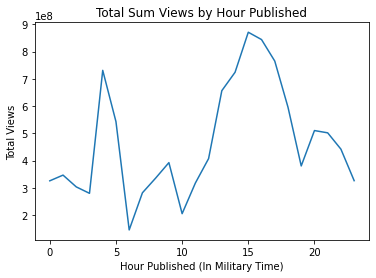

In [17]:
#Create a line graph to show this
time_df.groupby('Hour Published')['Total Views'].sum().plot(kind='line')

plt.title("Total Sum Views by Hour Published")
plt.xlabel("Hour Published (In Military Time)")
plt.ylabel("Total Views")

plt.savefig("TotalViewsSumperHourPublishedLine")

plt.show()

In [23]:
#Find total average views of all videos by hour published
totalviews = time_df.groupby('Hour Published')['Total Views'].mean()

totalviews

Hour Published
0     1.466666e+06
1     1.774216e+06
2     1.763896e+06
3     1.615851e+06
4     3.944657e+06
5     2.406613e+06
6     1.384962e+06
7     2.253822e+06
8     2.223092e+06
9     4.360425e+06
10    2.088470e+06
11    2.130629e+06
12    1.948112e+06
13    1.977816e+06
14    1.682570e+06
15    1.737291e+06
16    1.462809e+06
17    1.442232e+06
18    1.375696e+06
19    1.215296e+06
20    1.559301e+06
21    1.695018e+06
22    1.512056e+06
23    1.385349e+06
Name: Total Views, dtype: float64

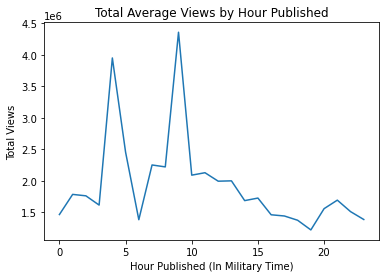

In [18]:
#Create line graph that shows time (x) by average views(y) 

#Create a line graph to show this
time_df.groupby('Hour Published')['Total Views'].mean().plot(kind='line')

plt.title("Total Average Views by Hour Published")
plt.xlabel("Hour Published (In Military Time)")
plt.ylabel("Total Views")

plt.savefig("TotalViewsMeanperHourPublishedLine")

plt.show()

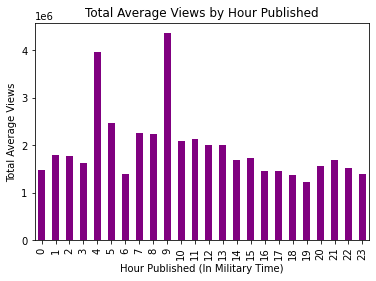

In [23]:
#Find average views vs. hour published and put into a bar graph

time_df.groupby('Hour Published')['Total Views'].mean().plot(kind='bar', color="purple")

plt.title("Total Average Views by Hour Published")
plt.xlabel("Hour Published (In Military Time)")
plt.ylabel("Total Average Views")

plt.savefig("TotalViewsMeanperHourPublishedBar")

plt.show()


What can I infer from this?